# Theoritcal Foundation of Machine Learning Final Project 


1.   Youseef Osama Ahmed 20190629
2.   Mohamed Alameen AbdAlziz 20190720
3.   Osama Khaled Abd-Alghafar
4.   Solhof
5.   Amira



In [ ]:
import numpy as np

# Loading the data
Using the keras datasets to load the data, the data is already splitied into train and test sets.
We just going to take a portion of the train to make a validation set

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


# Exploring the Data

(<matplotlib.image.AxesImage at 0x7fb53241f1d0>, array([9], dtype=uint8))

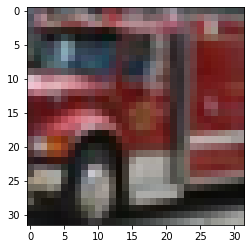

In [ ]:
import matplotlib.pyplot as plt
index = 88
plt.imshow(X_train[index]), y_train[index]

some image are too bad even a human being can't recognize it given the following image which is suppose to be for a **Deer**

(<matplotlib.image.AxesImage at 0x7fb531f58250>, array([4], dtype=uint8))

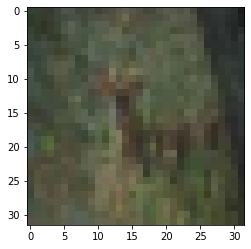

In [ ]:
plt.imshow(X_train[10]), y_train[10]

In [ ]:
labels = {1:  'airplane',   #back to the documntation
          2:  'bird', 
          3:  'cat', 
          4:  'deer', 
          5:  'dog', 
          6:  'frog', 
          7:  'horse', 
          8:  'ship', 
          9:  'truck'}

In [ ]:
unique, counts = np.unique(y_train, return_counts=True) #all the classes equal to each other
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

# Data Preprocessing

## Avg Pooling

 looking at the first image at the first pixel (0, 0) coordinates,at each pixel we got three RGB values and we are going to replace them by a single value computed by there avreage.

In [ ]:
def avg_pixels(data):
  data_avg = data.copy()
  for i in range(len(data)): #looping over the data
    for x in range(len(data[0])): #looping over the x_coordinates
      for y in range(len(data[0][0])): #looping over the y_coordinates
        data_avg[i][x][y] = np.average(data[i][x][y])
  return data_avg

In [ ]:
X_train_avg = avg_pixels(X_train)
X_test_avg = avg_pixels(X_test)

After Averging the images there is no change but only converted into gray images like the following examples

In [ ]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train[1])
axarr[0,1].imshow(X_train_avg[1])
axarr[1,0].imshow(X_train[100])
axarr[1,1].imshow(X_train_avg[100])

Since now all the RGB channels got the same value no need to keep them all instead we are going to keep only single chanel, converting each image into 32, 32 matrix, which provide efficent way in computation      
ex. the first image at first pixel will get the values (61, 61, 61) so  we will make it one channel (61)

In [ ]:
X_train_avg[0][0][0]

In [ ]:
def convert(data):
  imgs = []
  for i in range(len(data)):
    img = []
    for j in range(len(data[0])):
      tmp = [int(np.unique(hold)[0]) for hold in X_train_avg[i][j]]
      img.append(tmp)
    imgs.append(img)
  return np.asarray(imgs)

In [ ]:
X_train_conv = convert(X_train_avg)

a sample for converted image into 32 * 32 

In [ ]:
X_train_conv[0]

## Applying the momentum 

In [ ]:
def c_momentum(data, c = 3):
  m_data = []
  mean_x = (len(data[0][0]) + 1) / 2
  mean_y = (len(data[0][0].T) + 1) / 2
  for img in data:
    ms = []
    for p in range(c+1):
      for q in range(c+1):
        if p + q <= c:
          tmp = np.power(np.arange(len(data[0][0])) - mean_x, p) * np.power(np.arange(len(data[0].T[0] - mean_y)), q) * img
          ms.append(np.sum(np.sum(tmp)))
    m_data.append(ms)
  return np.asarray(m_data)

In [ ]:
X_train_m = c_momentum(X_train_conv)

In [ ]:
X_train_m[0]

## Spliting the training data into train and validation

In [ ]:
def train_val_split(data, labels, val_ratio):
    shuffled_indices = np.random.permutation(len(data))
    val_size = int(len(data) * val_ratio)
    val_indices = shuffled_indices[:val_size]
    train_indices = shuffled_indices[val_size:]
    return (data[train_indices], labels[train_indices], data[val_indices], labels[val_indices])

In [ ]:
X_train, y_train,  X_val, y_val = train_val_split(X_train, y_train, .10)